

# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Question(s) for Analysis
**Genres insights**: 
1. Which genres are most popular from year to year?
2. Which genre experienced the most evolution throughout the period 1960-2015?
3. Which genre generates the most revenue & profit for the whole period 1960-2015?

**Revenue insights**: What kinds of properties are associated with movies that have high revenues?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Read the file and have a first look at how the data is in few first lines
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# Explore specifically the column "Genres"
df['genres'].nunique()

2039

In [8]:
# Explore values in the column "Genres"
df['genres'].value_counts()

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 2039, dtype: int64

In [19]:
# Explore the numbers of movies produced for each year
df['release_year'].value_counts()

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1977     57
1979     57
1973     55
1971     55
1976     47
1974     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1960     32
1962     32
1961     31
1969     31
Name: release_year, dtype: int64

In [38]:
df['director'].value_counts().sort_values(ascending=False)

Woody Allen                45
Clint Eastwood             34
Martin Scorsese            29
Steven Spielberg           29
Ridley Scott               23
                           ..
Gordon Parks                1
George Sherman              1
Jean-Baptiste LÃ©onetti     1
Henry Hobson                1
Harold P. Warren            1
Name: director, Length: 5067, dtype: int64

In [44]:
# Check how many records with revenue = 0
sum(df['revenue'] == 0)

6016

In [45]:
# Check how many records with revenue_adj = 0

sum(df['revenue_adj'] == 0)

6016

In [51]:
# Check null values in the dataset
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
genre                     23
dtype: int64

In [53]:
# See more details on the data with genre is null to see how to tackle
df[df['genres'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0,NaN
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0,NaN
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0,NaN
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0,NaN
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0,NaN
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0,NaN
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0,NaN
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0,NaN
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0,NaN
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0,NaN


In [9]:
df['runtime'].sort_values(ascending=False).value_counts()

90     547
95     358
100    335
93     328
97     306
      ... 
336      1
294      1
285      1
282      1
900      1
Name: runtime, Length: 247, dtype: int64

In [10]:
df['runtime'].unique()

array([124, 120, 119, 136, 137, 156, 125, 141,  91,  94, 148, 108, 105,
       167, 109, 115, 112, 130, 123, 114, 131, 128, 132, 103, 117, 101,
        93, 111, 147, 106, 122, 116,  97,  92, 118, 121, 100, 133,  96,
       102,  95,  88,  99,  89, 107,   0,   8, 104,  98, 113,  85,  90,
        84,  82,  87,  31,  83,  48,  67,  86,  74, 134,   7, 110,  72,
        80, 127,  76,   5,  56, 135,  44,  75,  81,   4, 129,  78, 138,
       300,  62,  43,  77, 153,  70,  73,  14,  57,  71,  79, 168,  25,
        60, 246,  54,  52,  16,  65,  58,  18,  64,  30, 240,  17, 169,
       144, 145, 139, 165, 142, 164,  22,   6, 150, 146, 233,  41, 210,
        23,   3,   9, 152, 282, 163, 285,  66, 175, 155, 177, 143, 162,
       158, 140, 161, 170,  38, 149,  36,  27,  61,  11,  26, 176,  69,
        59, 500, 166, 185,  20,  21, 338, 182, 421,  15, 540, 184,  12,
       178,  47,  63,  45, 160, 189, 157, 159, 126, 188, 181, 180,  33,
       257, 183, 705, 174, 400, 191, 213, 179, 470,  32, 173,  4


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

### Points need to be clean
1. Remove null data
2. Remove duplicates
3. Optimize data type
4. Create 2 dataset for 2 questions:

    a. Dataset df_rev for revenue analysis - Remove rows with revenue = 0
    
    b. Dataset df_gen for genres analysis - Explode to each row a single genre

In [4]:
# Drop null values of Genres
df.dropna(subset=['genres'], inplace=True)

In [5]:
# Check duplicates & remove duplicates
sum(df.duplicated())

df.drop_duplicates(inplace=True)

In [6]:
# Optimize data type from int64 to int16 based on the describe of columns above,
# int16 is enough to store those kind of data
df['runtime'] = df['runtime'].astype("int16")
df['vote_count'] = df['vote_count'].astype("int16")
df['release_year'] = df['release_year'].astype("int16")

#### Create df_rev by removing rows with revenue = 0

In [7]:
# To analyze more on revenue patterns, we create another dataframe 
# which remove lines with Revenue = 0
df_rev = df[df['revenue'] != 0]

In [8]:
# Check if any rows with revenue = 0
sum( df_rev['revenue'] == 0 )

0

In [9]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4849 non-null   int64  
 1   imdb_id               4849 non-null   object 
 2   popularity            4849 non-null   float64
 3   budget                4849 non-null   int64  
 4   revenue               4849 non-null   int64  
 5   original_title        4849 non-null   object 
 6   cast                  4844 non-null   object 
 7   homepage              1665 non-null   object 
 8   director              4848 non-null   object 
 9   tagline               4385 non-null   object 
 10  keywords              4614 non-null   object 
 11  overview              4849 non-null   object 
 12  runtime               4849 non-null   int16  
 13  genres                4849 non-null   object 
 14  production_companies  4753 non-null   object 
 15  release_date        

#### Create df_gen to analyze genres

In [10]:
# To analyze some patterns by genres, we split the genres 
# to get the list of genres of a movie and then explode
df['genre'] = df['genres'].str.split('|')
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,"[Action, Adventure, Science Fiction, Thriller]"
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,"[Action, Adventure, Science Fiction, Thriller]"
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,"[Adventure, Science Fiction, Thriller]"
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,"[Action, Adventure, Science Fiction, Fantasy]"
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,"[Action, Crime, Thriller]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00,[Documentary]
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00,"[Action, Adventure, Drama]"
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00,"[Mystery, Comedy]"
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00,"[Action, Comedy]"


In [11]:
# Explode the genre list into several rows and put them into another dataframe
df_gen = df.explode(column="genre")

In [12]:
# Explore the genres available & see which one is the most popular
df_gen['genre'].value_counts().sort_values(ascending=False)

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genre, dtype: int64

In [13]:
df_gen['genre'].nunique()

20

In [14]:
df_gen.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Questions on Genres popularity and evolution)

In [15]:
# Groupby genre & release_year, count distinct id and sum the revenue
df_genagg = df_gen.groupby(['genre', 'release_year'], as_index=False).agg({'id': 'nunique', 'revenue_adj':'sum', 'budget_adj':'sum'})

# Rename the columns
df_genagg = df_genagg.rename(columns = {'id': 'count_movies', 'revenue_adj':'sum_revenue', 'budget_adj':'sum_budget'})

print(df_genagg)

        genre  release_year  count_movies   sum_revenue    sum_budget
0      Action          1960             8  4.785425e+08  1.032215e+08
1      Action          1961             7  2.421894e+08  1.167178e+08
2      Action          1962             8  7.900460e+08  1.881405e+08
3      Action          1963             4  6.329752e+08  2.057732e+08
4      Action          1964             5  8.780804e+08  2.460594e+07
...       ...           ...           ...           ...           ...
1044  Western          2011             3  4.082818e+08  2.888806e+08
1045  Western          2012             4  4.039911e+08  1.111201e+08
1046  Western          2013             3  8.454937e+07  2.452407e+08
1047  Western          2014             6  2.238241e+06  1.473746e+07
1048  Western          2015             6  6.338243e+08  2.316559e+08

[1049 rows x 5 columns]


#### Q1: Which genres are most popular from year to year?

In [16]:
# Find the maximum number of movies each year
genmax = df_genagg.groupby(['release_year'], as_index=False)['count_movies'].max()

# Merge with the df_genagg to get the name of genre and only 
# keep the necessary columns for the visualizations
genmax_viz = pd.merge(genmax, df_genagg, on = ['release_year', 'count_movies'])
genmax_viz.drop(['sum_revenue','sum_budget'], axis=1, inplace=True)

print(genmax_viz)

    release_year  count_movies   genre
0           1960            13   Drama
1           1961            16   Drama
2           1962            21   Drama
3           1963            13  Comedy
4           1963            13   Drama
5           1964            20   Drama
6           1965            20   Drama
7           1966            16  Comedy
8           1966            16   Drama
9           1967            17  Comedy
10          1968            20   Drama
11          1969            13   Drama
12          1970            19   Drama
13          1971            30   Drama
14          1972            16   Drama
15          1973            31   Drama
16          1974            21   Drama
17          1975            17   Drama
18          1976            22   Drama
19          1977            24   Drama
20          1978            29   Drama
21          1979            30   Drama
22          1980            32   Drama
23          1981            32   Drama
24          1982         

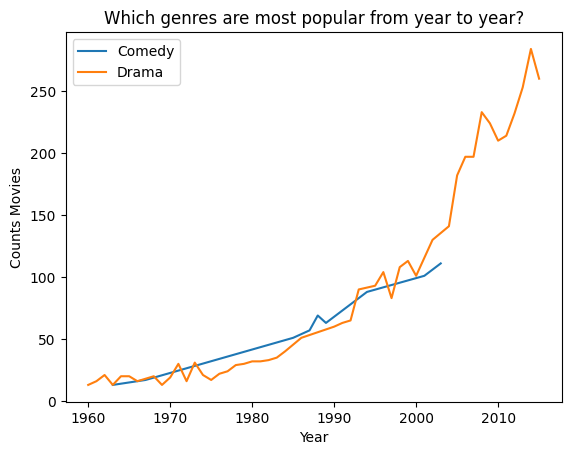

In [17]:
# Group the data by genre
grouped = genmax_viz.groupby('genre')

# Iterate over each genre and plot the line chart
for genre, group in grouped:
    plt.plot(group['release_year'], group['count_movies'], label=genre)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Counts Movies')
plt.title('Which genres are most popular from year to year?')
plt.legend()

# Show the plot
plt.show()

#### Q2: Which genre experienced the most evolution throughout the period 1960-2015?

In [18]:
# Filter the DataFrame for the years 1960 and 2015
genagg_1960 = df_genagg[df_genagg['release_year'] == 1960]
genagg_2015 = df_genagg[df_genagg['release_year'] == 2015]

# Merge the two filtered DataFrames on the 'genre' column
merge_df = pd.merge(genagg_1960, genagg_2015, on='genre', how='outer')

# There are some genres not yet appeared in 1960 & genres disappeared
# we fill the null value with 0
merge_df = merge_df.fillna(0)

# Calculate the gap for each genre
merge_df['gap'] = merge_df['count_movies_y'] - merge_df['count_movies_x']

# Rename the columns
merge_df = merge_df.rename(columns = {'count_movies_x':'counts_movies_1960', 'count_movies_y':'count_movies_2015'})

merge_df = merge_df[['genre', 'gap', 'counts_movies_1960', 'count_movies_2015']]

# Sort values gap descending
merge_df.sort_values(by='gap', ascending=False, inplace=True)

print(merge_df)

              genre    gap  counts_movies_1960  count_movies_2015
4             Drama  247.0                13.0              260.0
13         Thriller  165.0                 6.0              171.0
2            Comedy  154.0                 8.0              162.0
9            Horror  118.0                 7.0              125.0
0            Action   99.0                 8.0              107.0
12  Science Fiction   83.0                 3.0               86.0
1         Adventure   64.0                 5.0               69.0
17      Documentary   57.0                 0.0               57.0
11          Romance   51.0                 6.0               57.0
3             Crime   49.0                 2.0               51.0
18          Mystery   42.0                 0.0               42.0
5            Family   41.0                 3.0               44.0
16        Animation   39.0                 0.0               39.0
10            Music   32.0                 1.0               33.0
6         

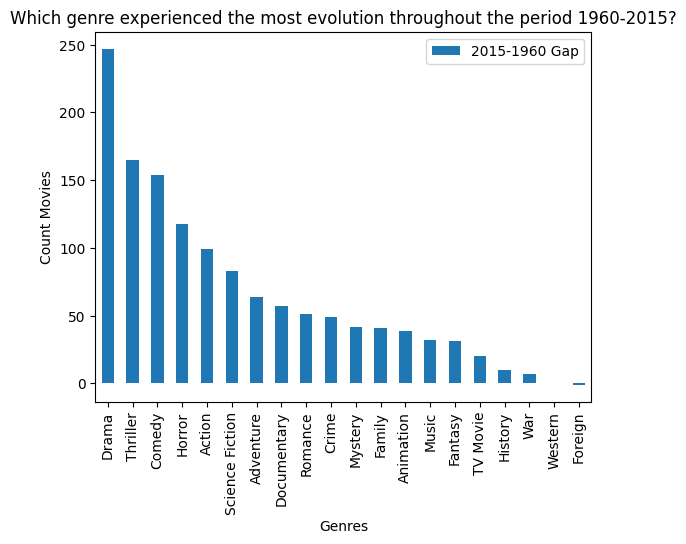

In [19]:
merge_df.plot(x='genre', y='gap', kind='bar', label='2015-1960 Gap')

plt.xlabel('Genres')
plt.ylabel('Count Movies')
plt.legend()
plt.title('Which genre experienced the most evolution throughout the period 1960-2015?')

plt.show()

#### Q3: Which genre generates the most revenue & profit for the whole period 1960-2015?

In [20]:
# Calculate the sum revenue & budget of each genre
gen_rev = df_genagg.groupby(by='genre').agg({'sum_revenue':'sum', 'sum_budget':'sum'})

# Calculate the profit & profit margin
gen_rev['profit'] = gen_rev['sum_revenue'] - gen_rev['sum_budget']

gen_rev['profit_margin'] = gen_rev['profit'] / gen_rev['sum_revenue'] * 100

# Sort values by revenue
gen_rev.sort_values(by='sum_revenue', ascending=False, inplace=True)

In [21]:
print(gen_rev)

                  sum_revenue    sum_budget        profit  profit_margin
genre                                                                   
Action           2.187517e+11  7.857690e+10  1.401748e+11      64.079414
Adventure        2.084043e+11  6.463182e+10  1.437724e+11      68.987285
Drama            1.923856e+11  7.070282e+10  1.216828e+11      63.249416
Comedy           1.816733e+11  6.038575e+10  1.212876e+11      66.761356
Thriller         1.607167e+11  6.012537e+10  1.005913e+11      62.589217
Family           1.080039e+11  3.314331e+10  7.486058e+10      69.312857
Science Fiction  1.068965e+11  3.628535e+10  7.061113e+10      66.055616
Fantasy          1.018905e+11  3.428525e+10  6.760523e+10      66.350878
Romance          8.251878e+10  2.680859e+10  5.571019e+10      67.512133
Crime            7.668570e+10  2.915638e+10  4.752932e+10      61.979383
Animation        5.959403e+10  1.768145e+10  4.191258e+10      70.330168
Mystery          4.122033e+10  1.578067e+10  2.5439

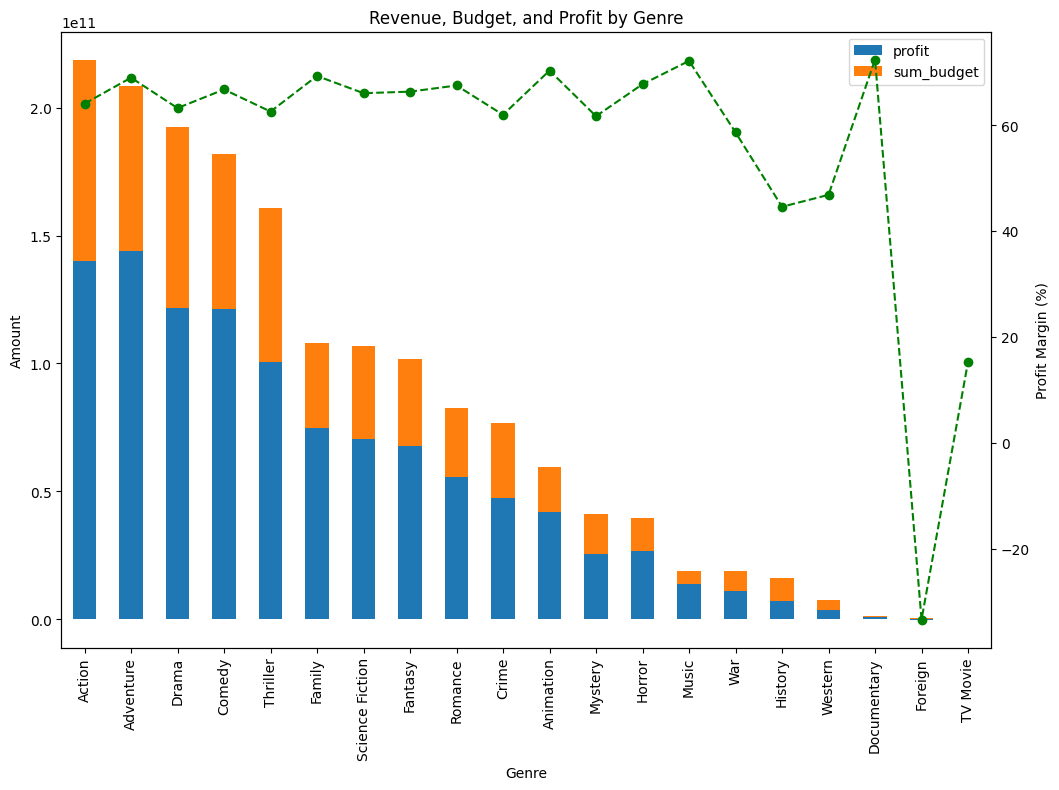

In [22]:
# Create stacked column chart
ax = gen_rev[['profit', 'sum_budget']].plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Amount')
ax.set_title('Revenue, Budget, and Profit by Genre')

# Add profit margin line
profit_margin = gen_rev['profit_margin']
ax2 = ax.twinx()
ax2.plot(gen_rev.index, profit_margin, color='green', linestyle='--', marker='o')
ax2.set_ylabel('Profit Margin (%)')

plt.show()

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [23]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [24]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4849 non-null   int64  
 1   imdb_id               4849 non-null   object 
 2   popularity            4849 non-null   float64
 3   budget                4849 non-null   int64  
 4   revenue               4849 non-null   int64  
 5   original_title        4849 non-null   object 
 6   cast                  4844 non-null   object 
 7   homepage              1665 non-null   object 
 8   director              4848 non-null   object 
 9   tagline               4385 non-null   object 
 10  keywords              4614 non-null   object 
 11  overview              4849 non-null   object 
 12  runtime               4849 non-null   int16  
 13  genres                4849 non-null   object 
 14  production_companies  4753 non-null   object 
 15  release_date        

In [25]:
rev_wo_outliers['popularity'].plot(kind='box')


NameError: name 'rev_wo_outliers' is not defined

In [26]:
df_rev['popularity'].mean()

1.0452015432047843

In [27]:
rev = df_rev[['id','popularity', 'vote_count', 'vote_average','budget_adj','revenue_adj']]

In [28]:
outliers = []
for column in ['popularity', 'vote_count', 'vote_average','budget_adj','revenue_adj']:
    q1 = rev[column].quantile(0.25)
    q3 = rev[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column_outliers = rev[(rev[column] < lower_bound) | (rev[column] > upper_bound)]
    outliers.append(column_outliers)

# Concatenate the outliers
outliers_df = pd.concat(outliers)

# Obtain the subset without outliers
rev_wo_outliers = rev.drop(outliers_df.index)

# Obtain the subset for visualization
rev_viz = rev_wo_outliers[rev_wo_outliers['revenue_adj'] >= rev_wo_outliers['revenue_adj'].mean()]

# Display the subset without outliers
print(rev_wo_outliers)

           id  popularity  vote_count  vote_average    budget_adj  \
65     249070    2.354654         820           5.5  3.219999e+07   
66     205775    2.345821         805           6.4  9.199996e+07   
69     271718    2.317670         849           6.1  3.219999e+07   
70     333352    2.295730         265           7.2  1.195999e+07   
71     276907    2.281350         619           6.7  2.299999e+07   
...       ...         ...         ...           ...           ...   
10822     396    0.670274          74           7.5  5.038511e+07   
10828    5780    0.402730          46           6.3  2.015404e+07   
10829    6644    0.395668          36           6.9  3.125892e+07   
10835    5923    0.299911          28           7.0  8.061618e+07   
10848    2161    0.207257          42           6.7  3.436265e+07   

        revenue_adj  
65     7.575981e+07  
66     8.631506e+07  
69     1.295321e+08  
70     3.022032e+07  
71     3.953514e+07  
...             ...  
10822  2.266436e+

In [121]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4849 non-null   int64  
 1   popularity    4849 non-null   float64
 2   vote_count    4849 non-null   int16  
 3   vote_average  4849 non-null   float64
 4   budget_adj    4849 non-null   float64
 5   revenue_adj   4849 non-null   float64
dtypes: float64(4), int16(1), int64(1)
memory usage: 365.8 KB


In [125]:
rev_wo_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4377 entries, 2 to 10848
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4377 non-null   int64  
 1   popularity    4377 non-null   float64
 2   vote_count    4377 non-null   int16  
 3   vote_average  4377 non-null   float64
 4   budget_adj    4377 non-null   float64
 5   revenue_adj   4377 non-null   float64
dtypes: float64(4), int16(1), int64(1)
memory usage: 213.7 KB


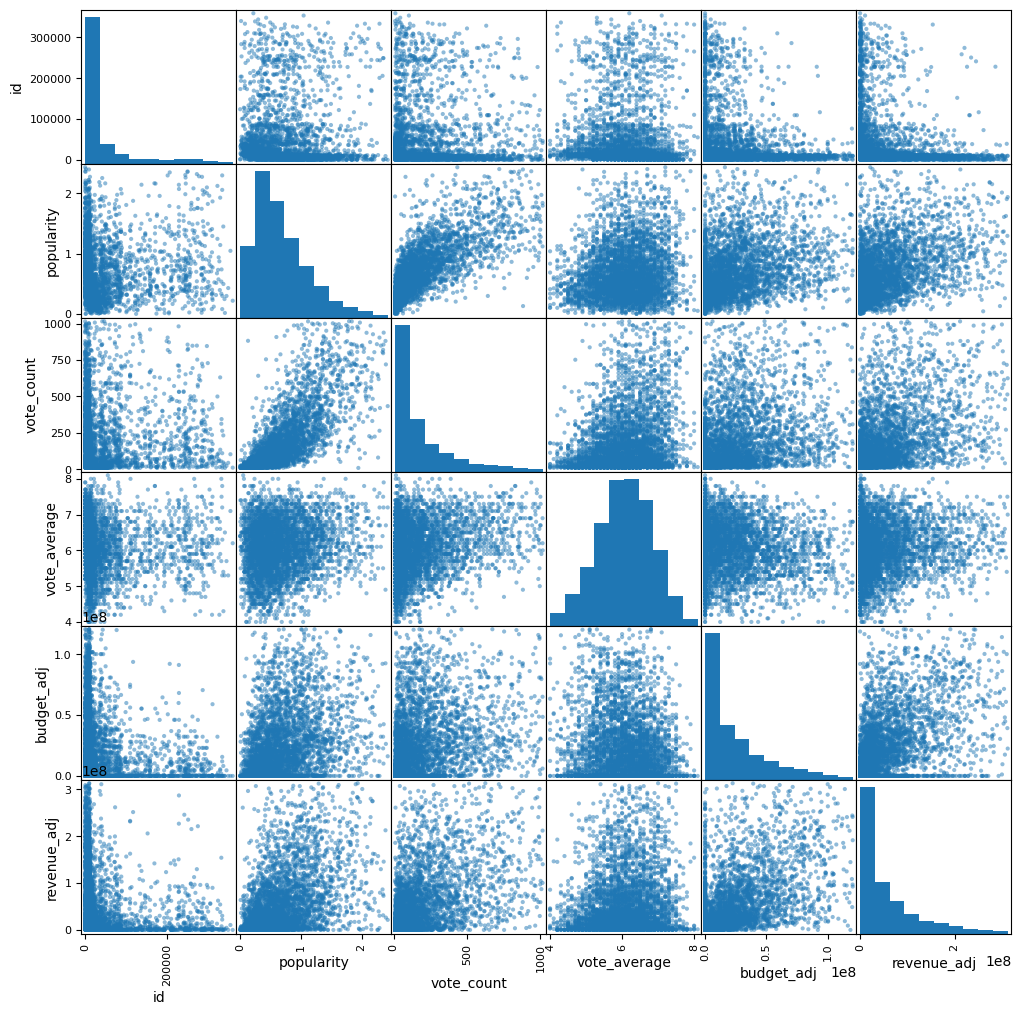

In [132]:
pd.plotting.scatter_matrix(rev_wo_outliers, figsize=(12, 12));

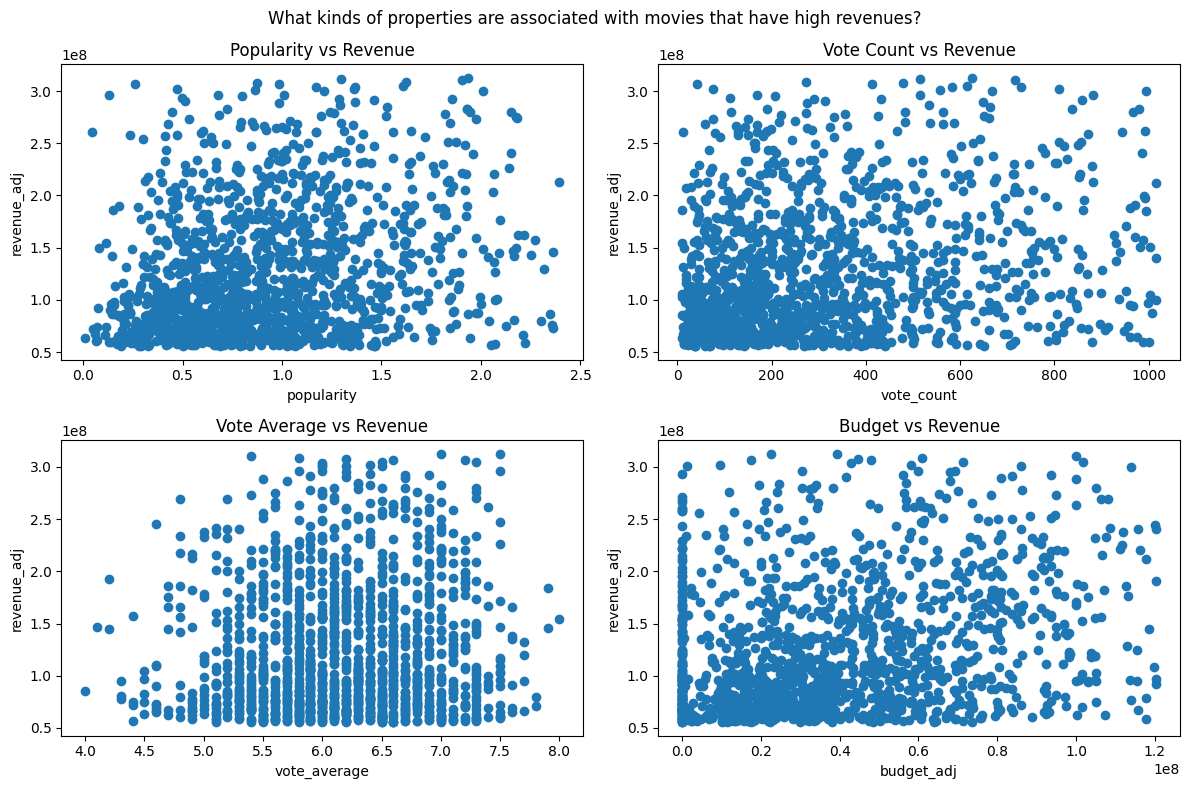

In [34]:
def create_scatter_plots(data, x_columns, y_column, titles):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    
    for i, ax in enumerate(axes.flat):
        ax.scatter(data[x_columns[i]], data[y_column])
        ax.set_xlabel(x_columns[i])
        ax.set_ylabel(y_column)
        ax.set_title(titles[i])
    
    fig.suptitle('What kinds of properties are associated with movies that have high revenues?')
    plt.tight_layout()
    plt.show()

x_columns = ['popularity', 'vote_count', 'vote_average', 'budget_adj']
y_column = 'revenue_adj'
titles = ['Popularity vs Revenue', 'Vote Count vs Revenue', 'Vote Average vs Revenue', 'Budget vs Revenue']

create_scatter_plots(rev_viz, x_columns, y_column, titles)

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


### Genres insights:
>Drama is most popular genre from 1960 to 2015 although there're some years Comedy ranked first in the popularity

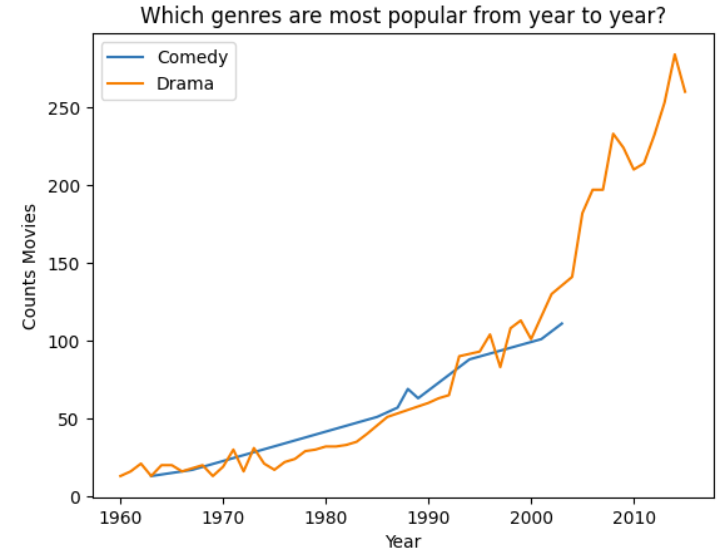

>Drama again ranked first in the evolution of the movies throughout the given period, the 2nd & 3rd place are Thriller and Comedy.

>Some genres including Documentary, Mystery, Animation just appeared recently not in 1960

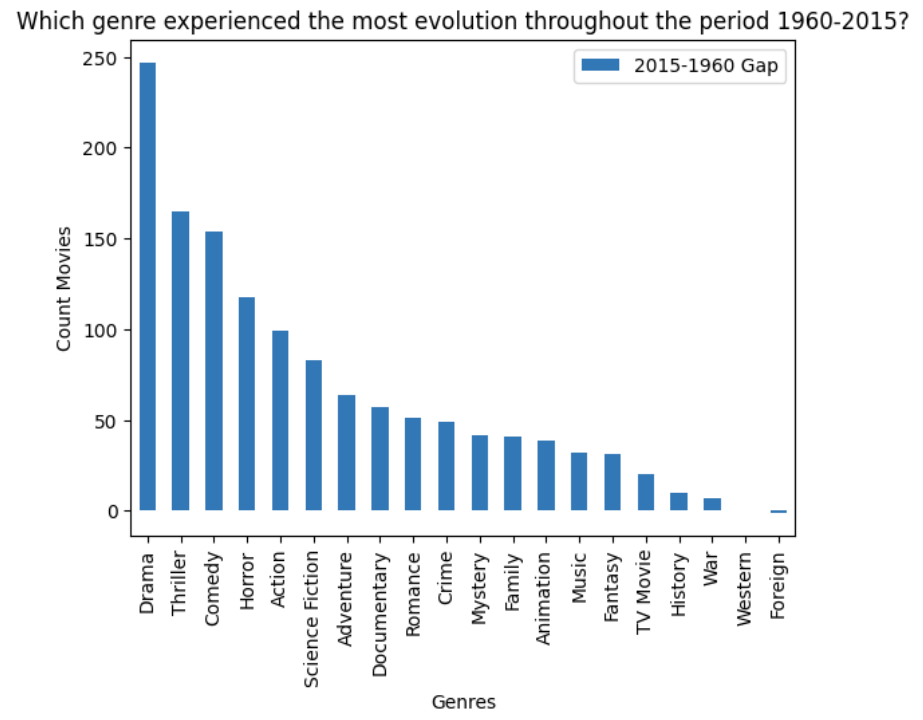

>Regarding the profit, Adventure movies accounts for the highest profit while its revenue ranked 2nd.

>Profit margin of most of the genres is above 60% 

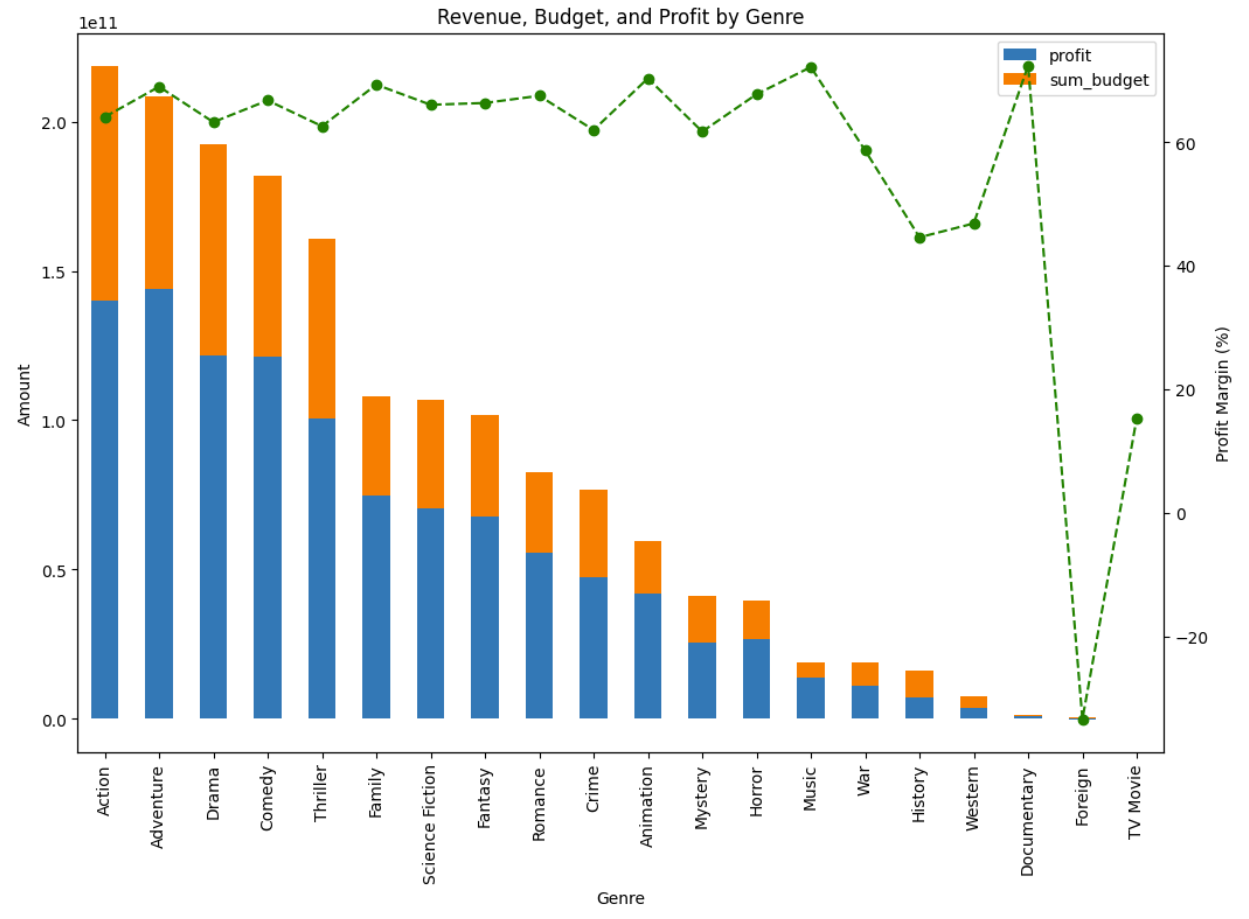

### Revenue insights

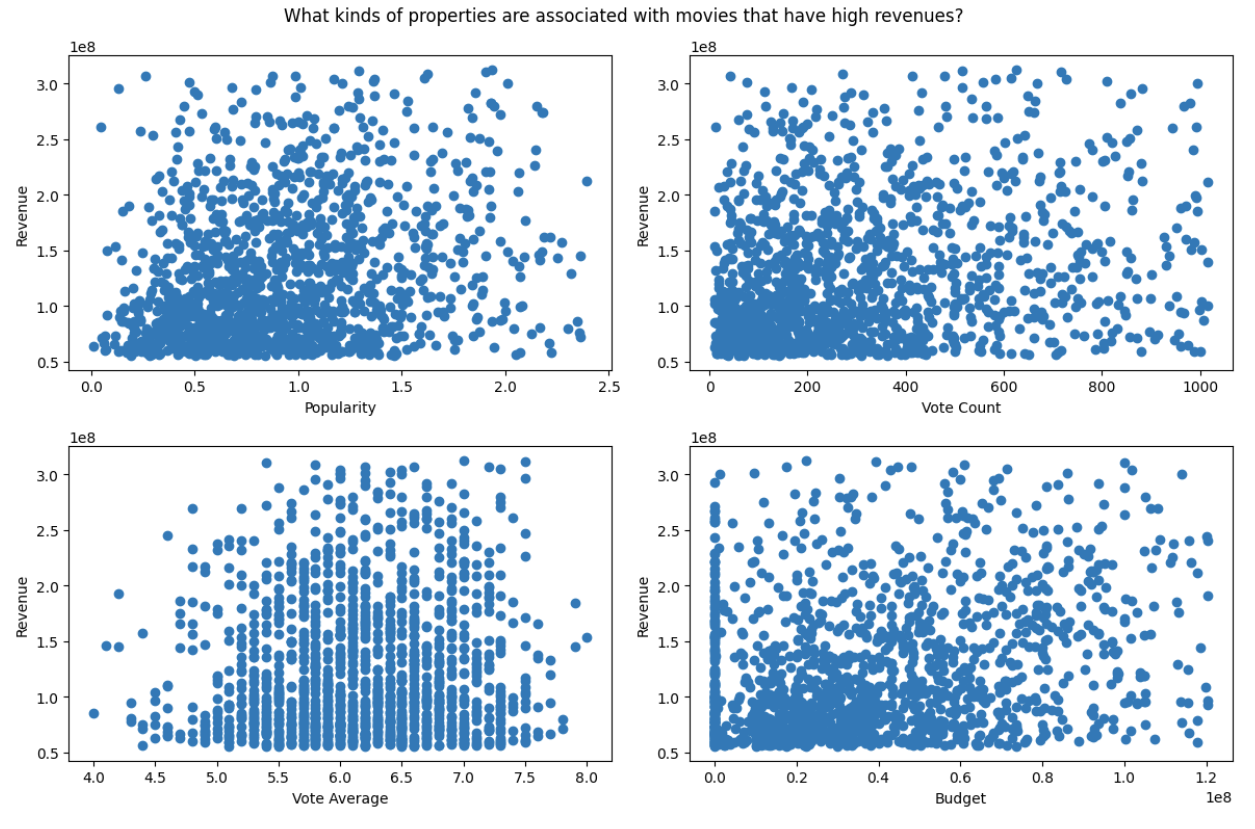

> Only around 40% of the records contain revenue data which is considered in this analysis

> It seems that there's no clear correlation among revenue and certain properties like: popularity, vote taken, vote average rate or budget. Further data needs collection to dive deeper into this topic

**Overall data process:** To get this analysis results, we've gone through several main stages
1. Define questions to answer
2. Data Wrangling: assess and clean 
3. Exploration: manipulate data to answer the defined questions, visualize to depict ideas
4. Conclusion: generate insights, stating some limitation points

**Limitation**: During data wrangling phase, more than 60% of the records revenue are zero which are removed so the overall results are also affected. Beside, there's no clear currency given in the dataset so we wouldn't know whether all records are in the same currency for comparision.

In [142]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 3144415 bytes to Investigate_a_Dataset.html
